***
# EDA for GEMSTONE PRICE PREDICTION

***


<div style="color: lightblue; font-size: 40px; font-family: 'Times New Roman';">Table of Contents</div>

<ol>
  <li><a href="#introduction">Introduction</a></li>
  <li><a href="#methods">Methods</a></li>
  <li><a href="#results">Results</a></li>
  <li><a href="#conclusion">Conclusion</a></li>
</ol>

<div id="introduction" style="color: magenta; font-weight: bold; font-size: 40px; font-family: 'Times New Roman';">Introduction</div>


<p> This dataset contains the prices of gemstones {Diamonds} (Regression Analysis). The dataset contains 10 independent variables (including <b> id </b>):

1. **`id`** :  unique identifier of each diamond
2. **`carat weight`**: Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
3. **`cut`**: The quality of the cut of the gemstones/diamonds.
4. **`color`**: The color of the gemstones/diamonds.
5. **`clarity`**: Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
6. **`depth`**: The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface).
7. **`table`**: A diamond's table is the facet which can be seen when the stone is viewed face up.
8. **`X`**: The length of the gemstones/diamonds. X is the length of the diamond as measured along the girdle.
9. **`Y`**: The width of the gemstones/diamonds. Y is the width of the diamond as measured along the girdle.
10. **`Z`**: The symmetry of the gemstones/diamonds. Z is the height of the diamond from the culet to the table.

<div style="color: White; font-weight: bold; font-style: italic; font-size: 25px;">
  Target variable:
</div>

**`Price`**: Price of the given Diamond.

The goal of this project is to predict the price of a gemstone based on independent variables.

Dataset Source Link : [GemStone Dataset](https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv)

#### Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('.\dataset\gemstone.csv')
df.head()


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [3]:
df.shape

(193573, 11)

<div style="color: White; font-weight: bold; font-style: italic; font-size: 25px;">
  1. Data Preprocessing
</div>
  
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [4]:
# check for missing values
df.isna().sum()
# no missing values

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [5]:
# check for duplicates

df.duplicated().sum()

# no duplicates

np.int64(0)

In [6]:
#check for data types

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [7]:
# Checking the number of unique values of each column
df.nunique()

id         193573
carat         248
cut             5
color           7
clarity         8
depth         153
table         108
x             522
y             521
z             349
price        8738
dtype: int64

In [8]:
# Check Summary Statistics

df.describe(include='all')


,id,carat,cut,color,clarity,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573,193573,193573,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,92454,44391,53272,NaN,NaN,NaN,NaN,NaN,NaN
mean,96786.000000,0.790688,NaN,NaN,NaN,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,NaN,NaN,NaN,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,NaN,NaN,NaN,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,NaN,NaN,NaN,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,NaN,NaN,NaN,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,NaN,NaN,NaN,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000


##### Seperating numerical and categorical columns

In [9]:
numerical_columns = list(df.columns[df.dtypes!='object'])
categorical_columns = list(df.columns[df.dtypes=='object'])
print(f'Numerical Columns   : {numerical_columns}')
print(f'Categorical Columns : {categorical_columns}')

Numerical Columns   : ['id', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price']
Categorical Columns : ['cut', 'color', 'clarity']


In [10]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,193573.0,NaN,NaN,NaN,96786.0,55879.856166,0.0,48393.0,96786.0,145179.0,193572.0
carat,193573.0,NaN,NaN,NaN,0.790688,0.462688,0.2,0.4,0.7,1.03,3.5
cut,193573,5,Ideal,92454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,193573,7,G,44391,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,193573,8,SI1,53272,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,193573.0,NaN,NaN,NaN,61.820574,1.081704,52.1,61.3,61.9,62.4,71.6
table,193573.0,NaN,NaN,NaN,57.227675,1.918844,49.0,56.0,57.0,58.0,79.0
x,193573.0,NaN,NaN,NaN,5.715312,1.109422,0.0,4.7,5.7,6.51,9.65
y,193573.0,NaN,NaN,NaN,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,NaN,NaN,NaN,3.534246,0.688922,0.0,2.9,3.53,4.03,31.3


In [11]:
# Categorical Columns Description


df[categorical_columns].describe().T


,count,unique,top,freq
cut,193573,5,Ideal,92454
color,193573,7,G,44391
clarity,193573,8,SI1,53272


In [12]:
# numerical Columns Description


df[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
id,193573.0,96786.000000,55879.856166,0.0,48393.00,96786.00,145179.00,193572.00
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


__INSIGHTS__:

- There are no missing values in the dataset.
- There are no duplicates in the dataset.
- The dataset contains 10 independent variables and 1 dependent variable.
- The dataset contains 3 categorical columns and 7 numerical columns.
- The dataset contains 5 unique values in the cut column.
- The dataset contains 7 unique values in the color column.
- The dataset contains 8 unique values in the clarity column.

<div style="color: White; font-weight: bold; font-style: italic; font-size: 25px;">
  2. Data Visualization
</div>

<div style="color: orange; font-weight: bold; text-align: center; font-style: italic; font-size: 18px;">
  UNIVARIATE ANALYSIS
</div>

Numerical Columns : ['id', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price']
Numerical Columns : ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']


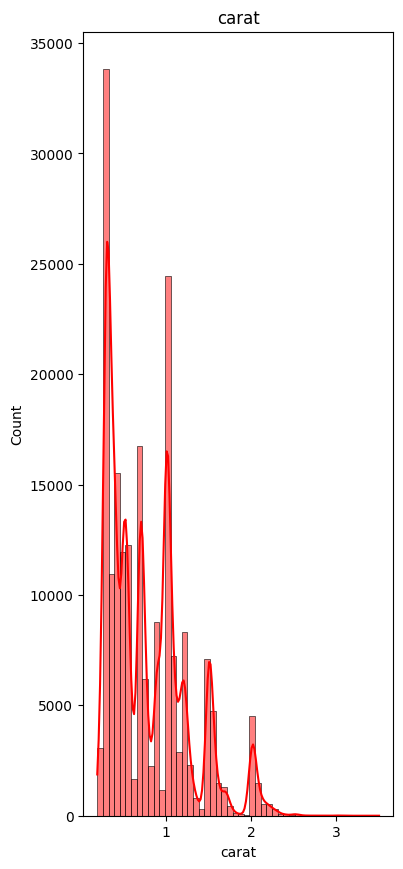

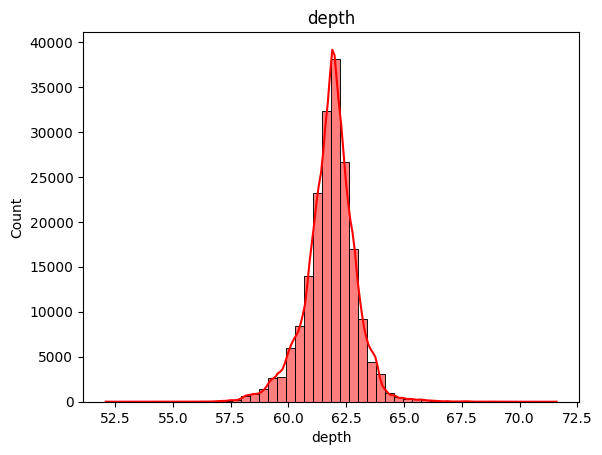

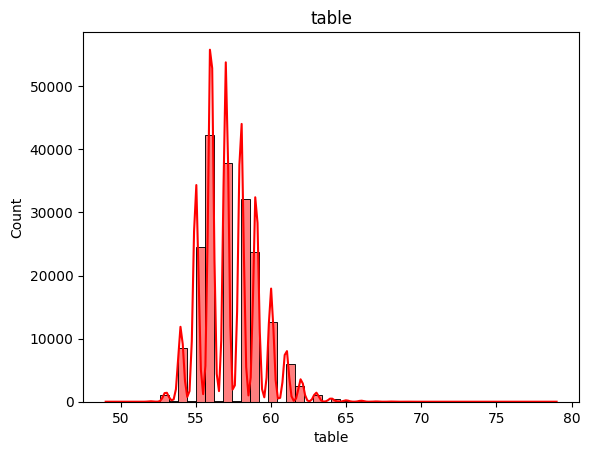

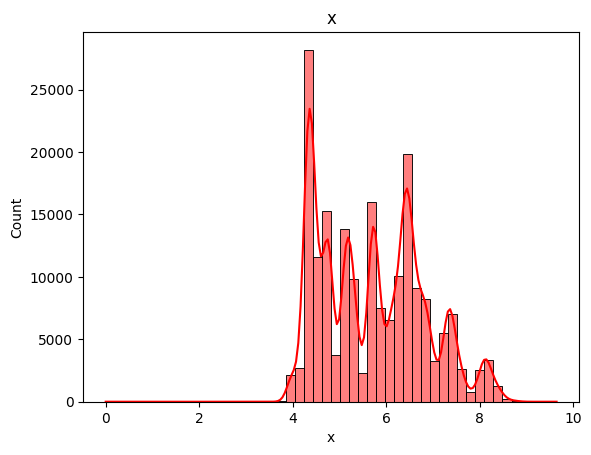

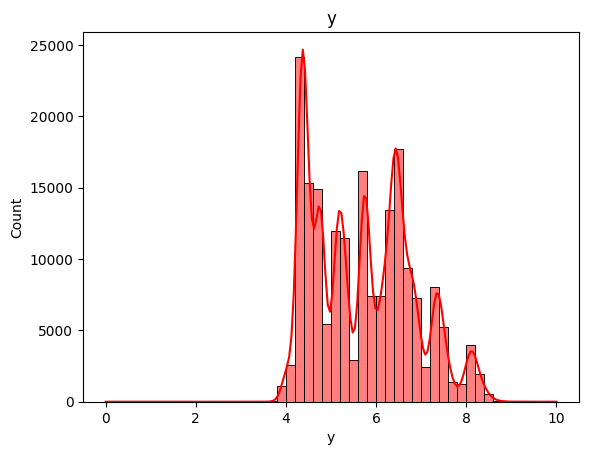

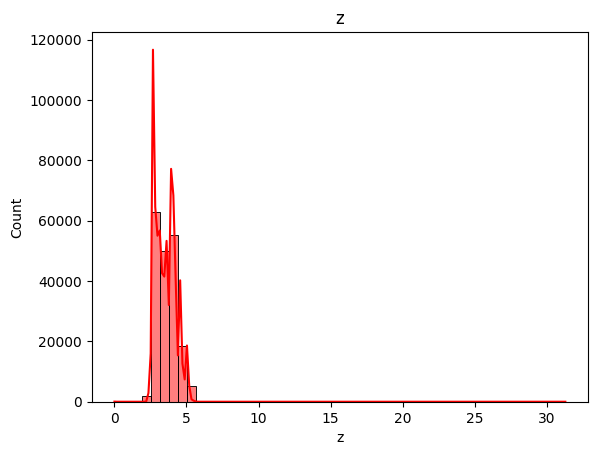

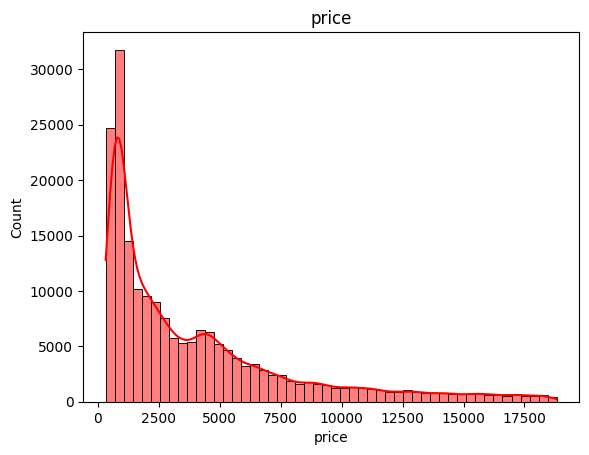

In [13]:
plt.figure(figsize=(4,8))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.5)
x = 1
numerical_columns = list(df.columns[df.dtypes!='object'])
print(f'Numerical Columns : {numerical_columns}')
#remove id column
numerical_columns.remove('id')
print(f'Numerical Columns : {numerical_columns}')
for i in numerical_columns:
    sns.histplot(data = df, x = i, bins=50, color='r', kde=True)
    plt.title(i)
    # print('\n')
    plt.show()

<div style="color: orange; font-weight: bold; text-align: center; font-style: italic; font-size: 18px;">
  Univariate analysis for categorical variables
</div>

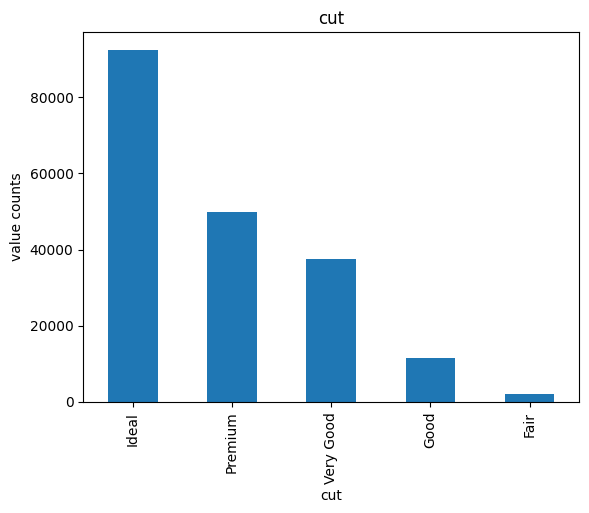

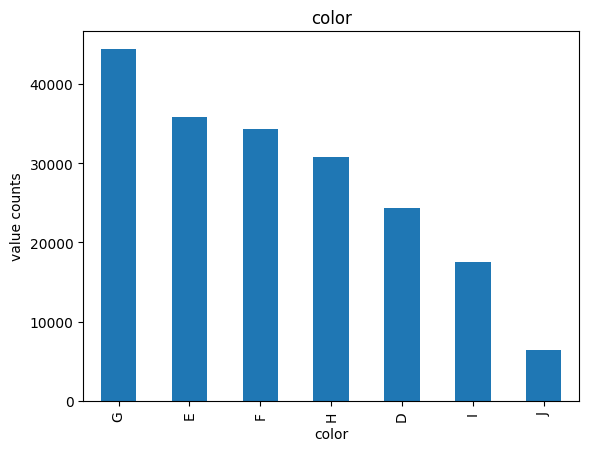

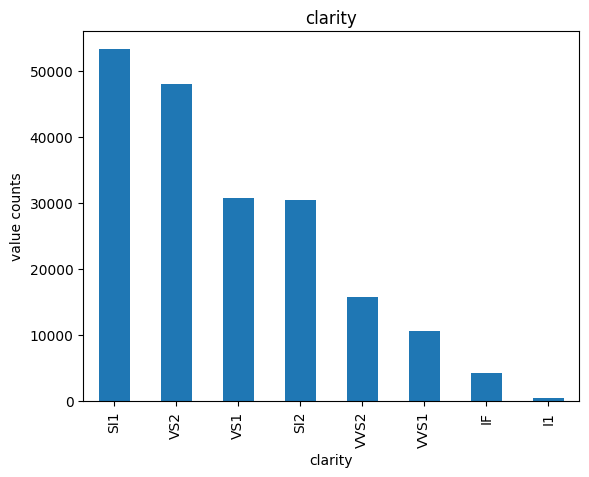

In [14]:
for i in categorical_columns:
    df[i].value_counts().plot(kind='bar', xlabel = i , ylabel='value counts', title = i)
    print('\n')
    plt.show()

<div style="color: orange; font-weight: bold; text-align: center; font-style: italic; font-size: 18px;">
  BIVARIATE ANALYSIS
</div>

<div style="color: White; font-size: 18px;">
 A heatmap is a powerful visualization tool in data science that helps in understanding the relationships between variables in a dataset, particularly in feature extraction and selection. So, we will use a heatmap to understand the correlation between the independent variables and the dependent variable.
</div>

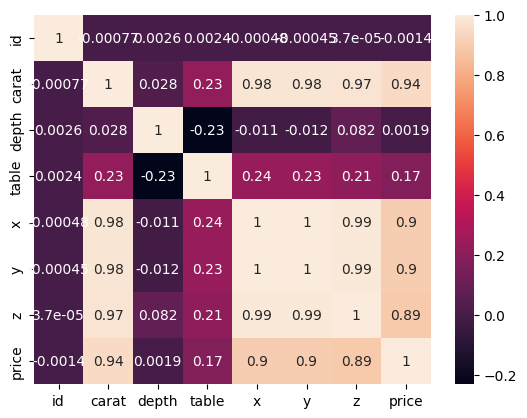

In [15]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

__INSIGHTS__ :
  
- The price of the gemstone is highly correlated with the carat weight of the gemstone.
- The price of the gemstone is highly correlated with the length of the gemstone (X), width of the gemstone (Y), and height of the gemstone (Z).
- The X, Y, Z, and Price are highly correlated.
- The X, Y, Z, and Carat weight are highly correlated.



<div style="color: White; font-weight: bold; font-style: italic; font-size: 25px;">
 Data Analysis and Feature Engineering
</div>
  


#### 1. Pairplot (Scatterplot Matrix)  
 The pairplot is a graphical representation of the relationship between the dependent variable and the independent variables. It is a scatterplot that shows the relationship between two variables in a dataset. The pairplot is a powerful visualization tool that helps in understanding the relationship between the dependent variable and the independent variables in a dataset.

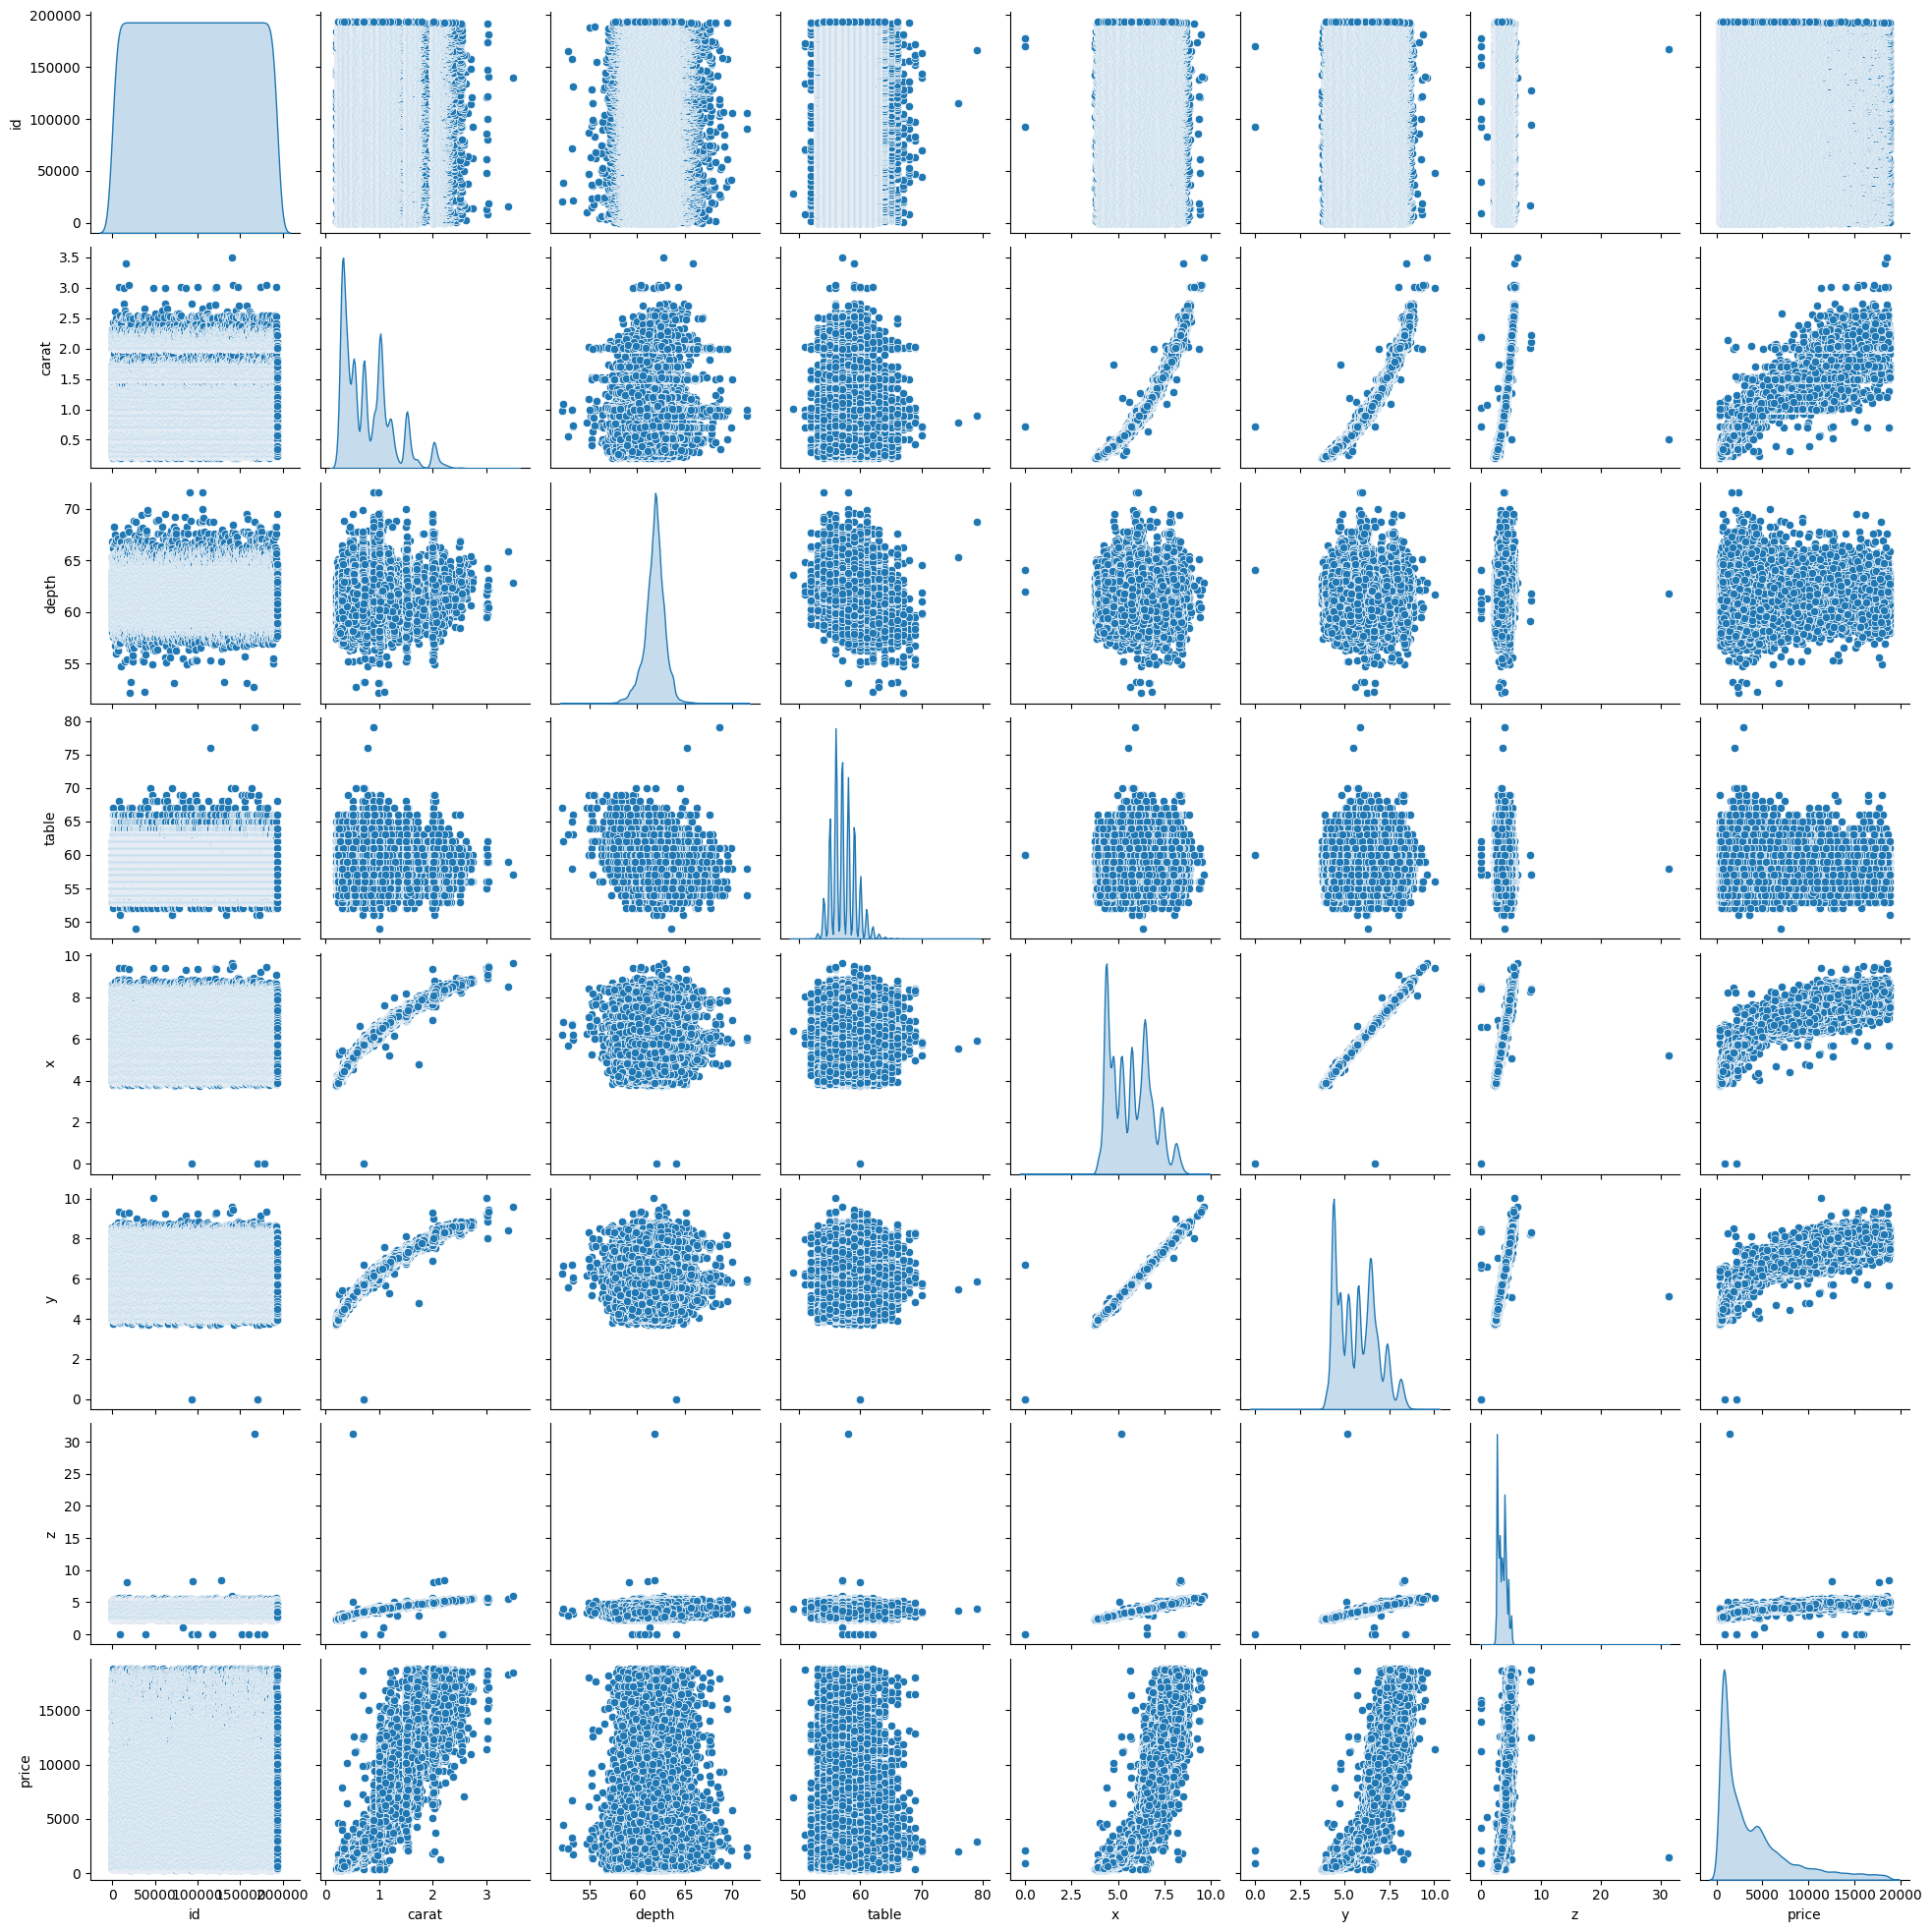

In [16]:
sns.pairplot(df,diag_kind='kde')
plt.show()

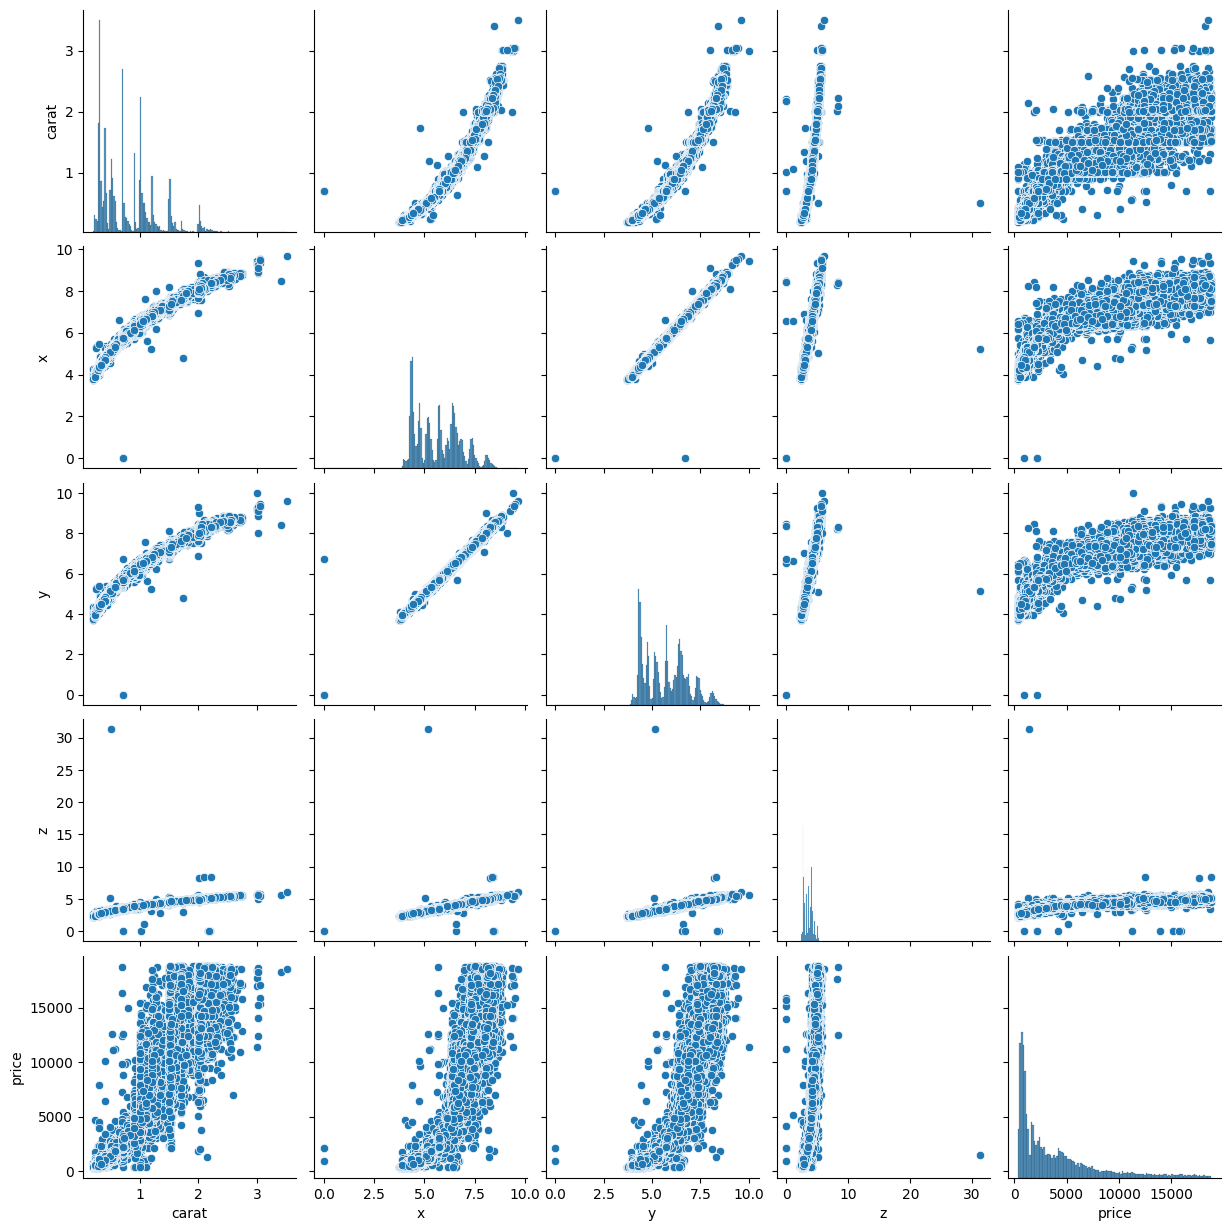

In [17]:
sns.pairplot(df[['carat', 'x', 'y', 'z', 'price']])
plt.show()

#### 2. Boxplots for Distribution and Outliers
Boxplots are useful for visualizing the distribution of individual features and identifying potential outliers.

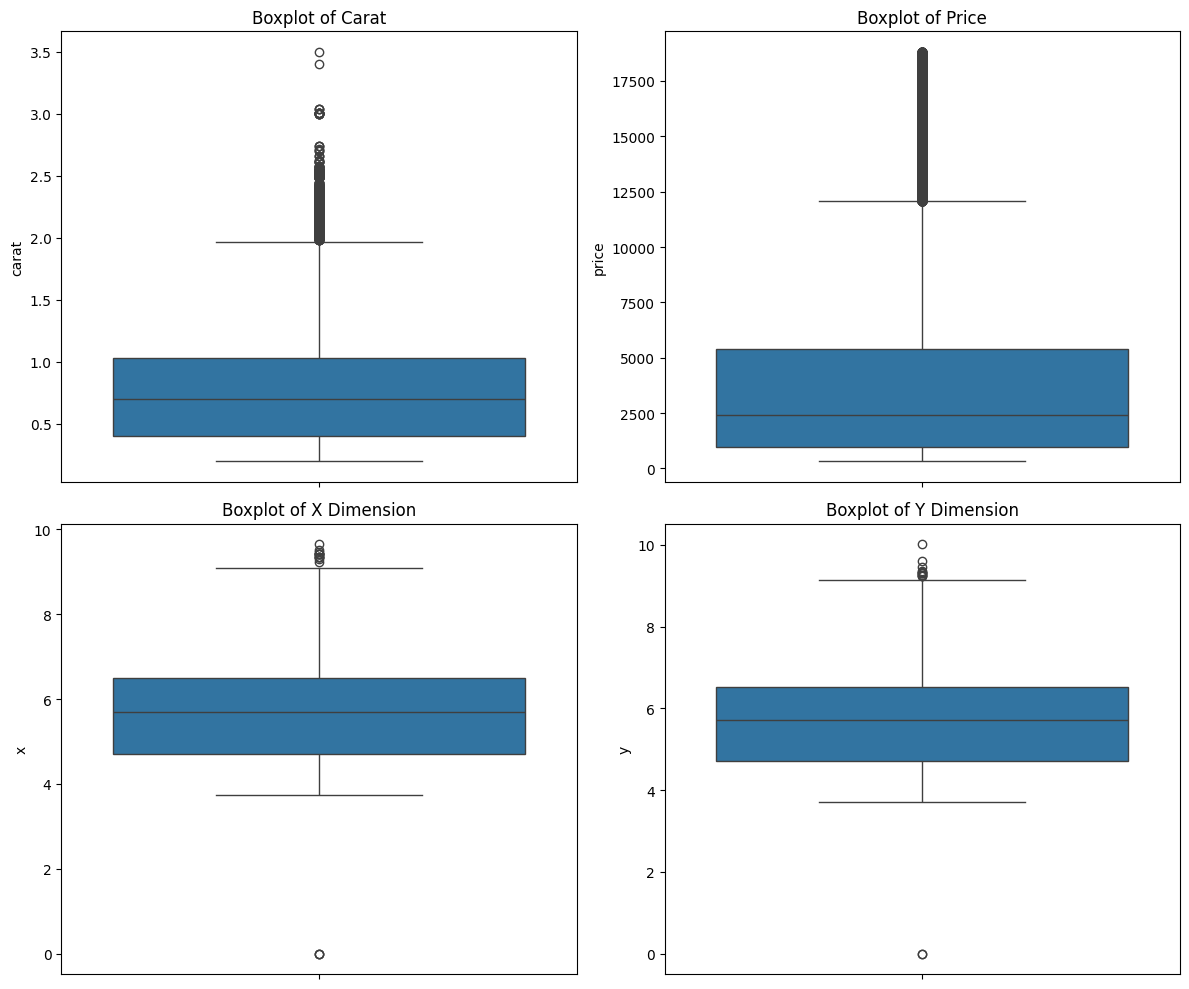

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(ax=axes[0, 0], y=df['carat'])
axes[0, 0].set_title('Boxplot of Carat')

sns.boxplot(ax=axes[0, 1], y=df['price'])
axes[0, 1].set_title('Boxplot of Price')

sns.boxplot(ax=axes[1, 0], y=df['x'])
axes[1, 0].set_title('Boxplot of X Dimension')

sns.boxplot(ax=axes[1, 1], y=df['y'])
axes[1, 1].set_title('Boxplot of Y Dimension')

plt.tight_layout()
plt.show()


#### 3. Jointplot
Jointplot shows the scatterplot of two features along with their marginal distributions. This can be particularly useful for analyzing the relationship between `carat` and `price`.

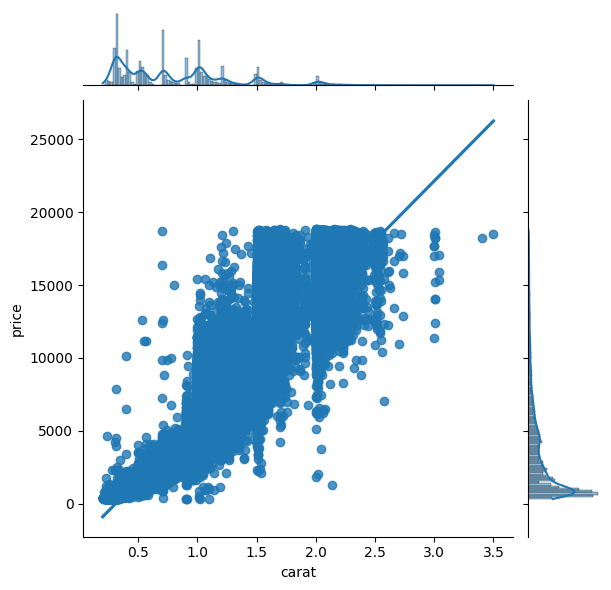

In [19]:
sns.jointplot(x='carat', y='price', data=df, kind='reg')  # 'reg' adds a regression line
plt.show()


#### 4. Correlation Matrix with Heatmap
While the heatmap has already been used, it can be fine-tuned or extended to only show the most correlated features or to exclude the diagonal.

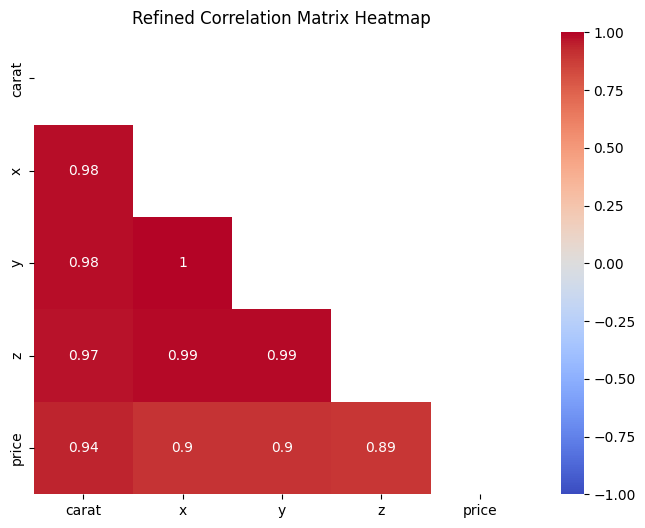

In [20]:
# Creating a refined correlation matrix heatmap
plt.figure(figsize=(8, 6))
corr_matrix = df[['carat', 'x', 'y', 'z', 'price']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=np.triu(corr_matrix))
plt.title('Refined Correlation Matrix Heatmap')
plt.show()


#### 5. Violin Plots
Violin plots combine aspects of boxplots and density plots, providing a deeper understanding of the data distribution and density across different feature values.

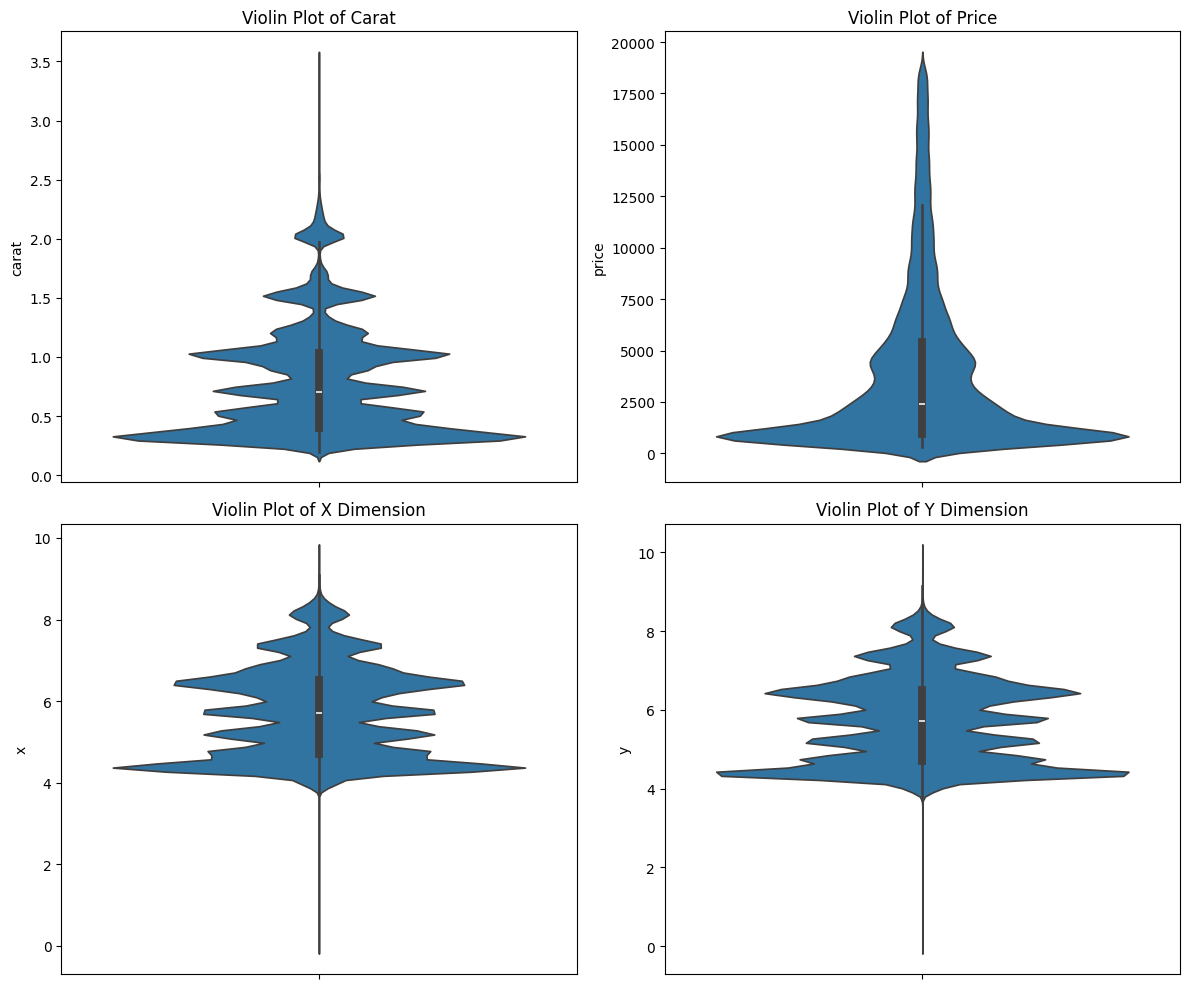

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.violinplot(ax=axes[0, 0], y=df['carat'])
axes[0, 0].set_title('Violin Plot of Carat')

sns.violinplot(ax=axes[0, 1], y=df['price'])
axes[0, 1].set_title('Violin Plot of Price')

sns.violinplot(ax=axes[1, 0], y=df['x'])
axes[1, 0].set_title('Violin Plot of X Dimension')

sns.violinplot(ax=axes[1, 1], y=df['y'])
axes[1, 1].set_title('Violin Plot of Y Dimension')

plt.tight_layout()
plt.show()


#### 6. Histogram or KDE (Kernel Density Estimate) Plot
These plots are useful for visualizing the distribution of features

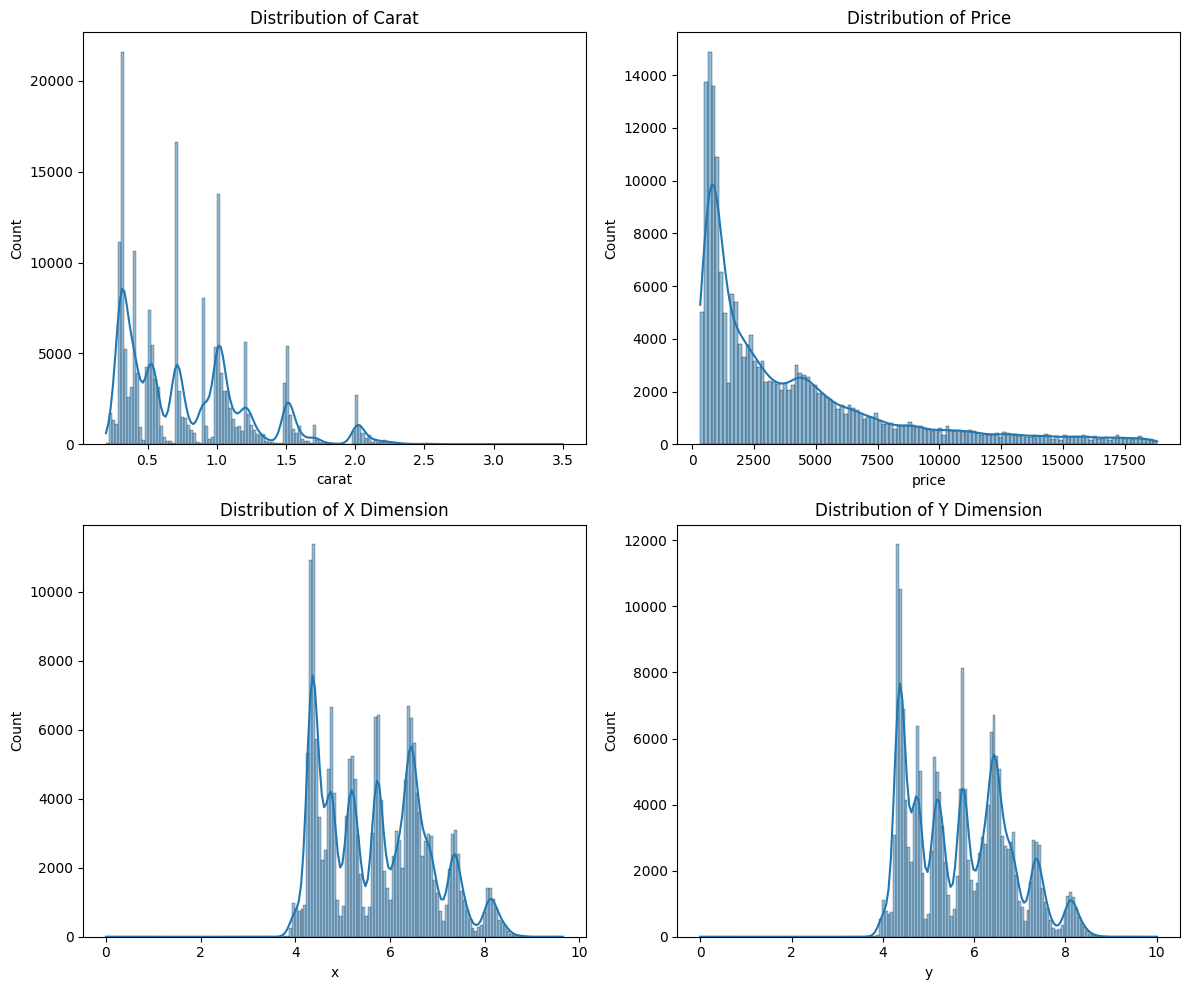

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(ax=axes[0, 0], x=df['carat'], kde=True)
axes[0, 0].set_title('Distribution of Carat')

sns.histplot(ax=axes[0, 1], x=df['price'], kde=True)
axes[0, 1].set_title('Distribution of Price')

sns.histplot(ax=axes[1, 0], x=df['x'], kde=True)
axes[1, 0].set_title('Distribution of X Dimension')

sns.histplot(ax=axes[1, 1], x=df['y'], kde=True)
axes[1, 1].set_title('Distribution of Y Dimension')

plt.tight_layout()
plt.show()


#### Categorical Features vs Target Feature Price Boxplot


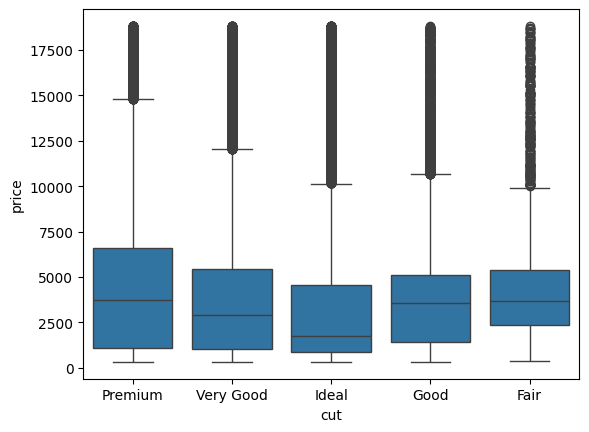

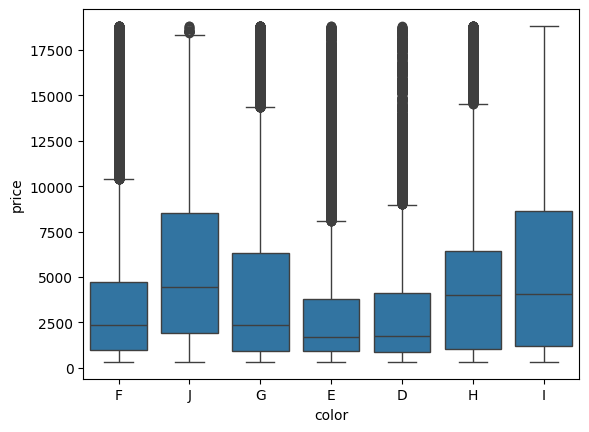

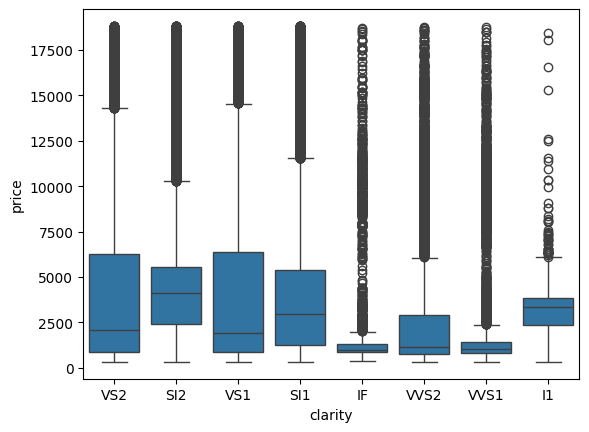

In [24]:
for i in categorical_columns:
    sns.boxplot(data=df, x=i , y='price')
    plt.show()

__INSIGHTS__ :

- It is observed that the categorical variables have a significant impact on the price of the gemstone.
- `Cut` and `Color` have a significant impact on the price of the gemstone.
- `Cut`, `clarity`  and `Color` are ordinal categorical variables. Ordinal means that the categories have a natural order, and the order of the categories is important.

#### Creating Mapper for each categorical variable


In [25]:
cut_mapper = {"Fair":1, "Good":2, "Very Good":3 , "Premium":4 ,"Ideal":5}
clarity_mapper = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_mapper = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

#### Applying the mapper to the dataframe

In [27]:
df['cut'] = df['cut'].replace(cut_mapper)
df['clarity'] = df['clarity'].replace(clarity_mapper)
df['color'] = df['color'].replace(color_mapper)

In [28]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


#### Seperating X and Y  (Independent and Dependent Variables)

In [29]:
X = df.drop(labels=['price'],axis=1)
Y = df[['price']]

In [31]:
from sklearn.feature_selection import mutual_info_regression
mi_scores = mutual_info_regression(X,Y.values.flatten(),random_state=42)
mi_scores = pd.Series(mi_scores, name="MI Scores",index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
print(mi_scores)

carat      1.825942
x          1.673070
y          1.667349
z          1.615879
clarity    0.398236
color      0.283369
table      0.107189
cut        0.092456
depth      0.045272
id         0.000078
Name: MI Scores, dtype: float64


In [32]:
import numpy as np

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    plt.show()

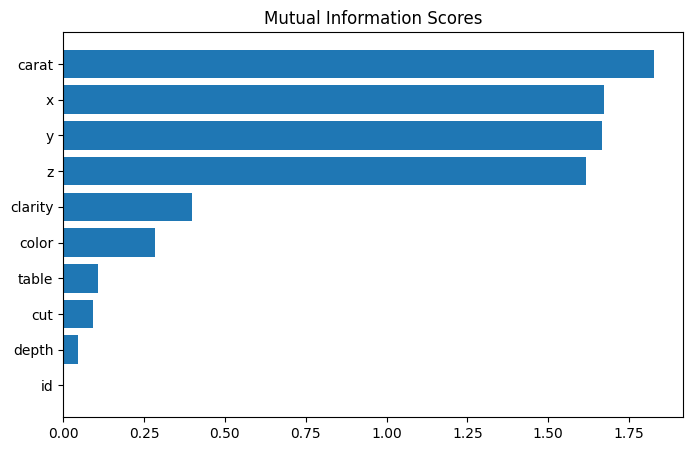

In [33]:

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

__INSIGHTS__ :

- Above shows that carat and x, y, z are most important features to predict the price of a gemstone.

